In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('micro credit card.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


Observation: Above is my dataset and label is my target column i have to predict the probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.So clearly it's a Classification problem.

In [3]:
df.shape

(209593, 37)

In [4]:
print(df.columns)

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

There is no null values in the dataset and we can also see the datatypes of each column.

# Features information:



    label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
    msisdn : mobile number of user
    aon : age on cellular network in days
    daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
    daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
    rental30 : Average main account balance over last 30 days
    rental90 : Average main account balance over last 90 days
    last_rech_date_ma : Number of days till last recharge of main account
    last_rech_date_da: Number of days till last recharge of data account
    last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)
    cnt_ma_rech30 : Number of times main account got recharged in last 30 days
    fr_ma_rech30 : Frequency of main account recharged in last 30 days
    sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
    medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
    medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
    cnt_ma_rech90 : Number of times main account got recharged in last 90 days
    fr_ma_rech90 : Frequency of main account recharged in last 90 days
    sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
    medianamnt_ma_rech90 : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
    medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
    cnt_da_rech30 : Number of times data account got recharged in last 30 days
    fr_da_rech30: Frequency of data account recharged in last 30 days
    cnt_da_rech90 : Number of times data account got recharged in last 90 days
    fr_da_rech90 : Frequency of data account recharged in last 90 days
    cnt_loans30 : Number of loans taken by user in last 30 days
    amnt_loans30: Total amount of loans taken by user in last 30 days
    maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days
    medianamnt_loans30 : Median of amounts of loan taken by the user in last 30 days
    cnt_loans90 : Number of loans taken by user in last 90 days
    amnt_loans90 : Total amount of loans taken by user in last 90 days
    maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days
    medianamnt_loans90 : Median of amounts of loan taken by the user in last 90 days
    payback30 : Average payback time in days over last 30 days
    payback90 : Average payback time in days over last 90 days
    pcircle : telecom circle
    pdate : date



# Preprocessing and EDA:

In [6]:
#Checking shape of dataset
df.shape

(209593, 37)

In this perticular dataset we have 209593 rows and 37 columns.

In [7]:
#Checking all column names
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Above are the list of column names in the dataset.

In [8]:
#Checking the data types of all columns
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

I have all 3 types of data in dataset they are integer, float and object.pdate should be a datetime datatype so we have to change it from object to datetime datatype.

In [9]:
#Checking unique values of each column
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            146328
daily_decr90            155483
rental30                131338
rental90                139036
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     23907
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     22694
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam



'Unnamed:0' is a index column in raw dataset so we can drop it here itself. And pcircle has only one entry throughout so it will have no contribution with our model training we can drop this column also. Also msisdn is a column with phone numbers of users so this column has no contribution on model building.

In [10]:
#Droping Unnamed: 0, msisdn and pcircle column
df = df.drop(["Unnamed: 0"],axis=1)
df = df.drop(["pcircle"],axis=1)
df = df.drop(["msisdn"],axis=1)

In [11]:
#Checking null values in the dataset
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

There is no null values in our dataset.

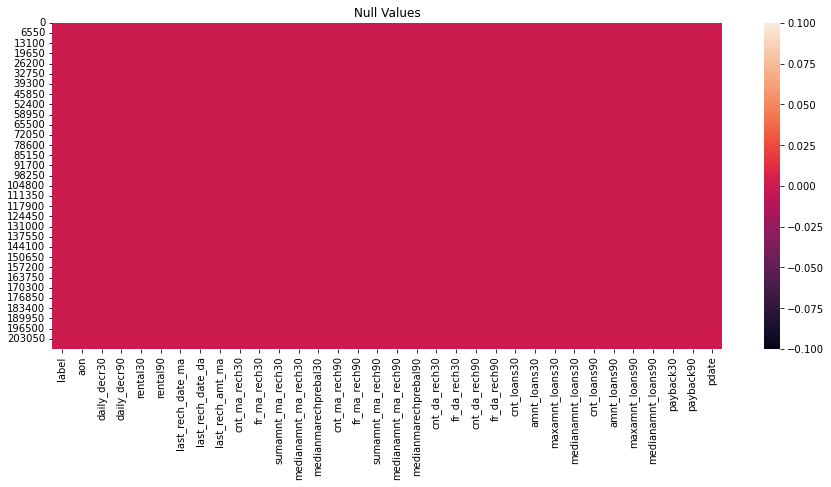

In [12]:
#Visualizeing null values
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By visualization we can clearly say that there is no null values in the dataset.

In [13]:
#Checking unique values of target column
df['label'].unique()

array([0, 1], dtype=int64)

There is only two unique values in target column so its a binary classification problem.

In [14]:
#Checking for empty observations
df.loc[df['label'] == " "]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate


There is no empty observations in my target column.

# Feature Extraction:

In [15]:
#Converting object data type to datetime 
df['pdate'] =  pd.to_datetime(df['pdate'])

In [16]:
#Extracting paid year,month and day from pdate

#Extracting year
df["pyear"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.year

#Extracting month
df["pmonth"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.month

#Extracting day
df["pday"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.day

In [17]:
#Droping pdate column after extraction
df = df.drop(["pdate"],axis=1)

I have successfully extracted day, month and year column from pdate column.

In [18]:
#Checking the value counts of pyear column
df.pyear.value_counts()

2016    209593
Name: pyear, dtype: int64

So in pyear column all the entries are of year 2016 keeping all entries same will not help our training so let's drop it.

In [19]:
#Droping pyear column
df = df.drop(["pyear"],axis=1)

In [20]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pmonth', 'pday'],
      dtype='object')

In [21]:
#Checking the value counts of last_rech_date_da column
df.last_rech_date_da.value_counts()

0.0000         202861
7.0000            163
8.0000            160
11.0000           149
13.0000           148
                ...  
731116.8745         1
609105.6623         1
945424.2537         1
505559.4527         1
636529.1273         1
Name: last_rech_date_da, Length: 1174, dtype: int64

I have 97% zeros in this column.

In [22]:
#Checking the value counts of cnt_da_rech30 column
df.cnt_da_rech30.value_counts()

0.00000        205479
1.00000          2331
2.00000           372
3.00000           156
4.00000            86
                ...  
13710.64367         1
84844.56285         1
65385.40352         1
93840.66307         1
61002.42135         1
Name: cnt_da_rech30, Length: 1066, dtype: int64

I have 98% zeros in this column.

In [23]:
#Checking the value counts of fr_da_rech30 column
df.fr_da_rech30.value_counts()

0.0000         208014
3.0000             64
1.0000             55
2.0000             51
7.0000             47
                ...  
757900.5305         1
870976.4775         1
797647.0019         1
519699.8854         1
509386.3027         1
Name: fr_da_rech30, Length: 1072, dtype: int64

I have 99% zeros in this column.

In [24]:
#Checking the value counts of cnt_da_rech90 column
df.cnt_da_rech90.value_counts()

0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
12         7
11         7
13         6
10         6
16         4
18         3
15         2
20         1
25         1
28         1
30         1
22         1
38         1
19         1
27         1
17         1
Name: cnt_da_rech90, dtype: int64

I have 97% zeros in this column.

In [25]:
#Checking the value counts of fr_da_rech90 column
df.fr_da_rech90.value_counts()

0     208728
3         78
1         66
2         66
4         56
7         55
6         52
5         45
8         44
10        33
14        32
9         32
11        30
12        27
19        22
28        19
15        17
13        17
18        16
29        15
16        14
17        14
25        11
22        11
21        10
20         9
32         8
24         8
27         8
26         7
30         7
31         6
34         5
37         5
23         5
57         3
35         2
41         2
42         1
39         1
33         1
43         1
56         1
46         1
55         1
64         1
Name: fr_da_rech90, dtype: int64

I have 99% zeros in this column.

In [26]:
#Checking the value counts of medianamnt_loans30 column
df.medianamnt_loans30.value_counts()

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

I have 93% zeros in this column.

In [27]:
#Checking the value counts of medianamnt_loans90 column
df.medianamnt_loans90.value_counts()

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

I have 94% zeros in this column.

# In all the above columns i found more than 90% zeros so they will create skewness in our dataset. So we have to drop these columns. {I have also looked into the valuecounts of other columns and they looked perfect, but i have removed there coding and output due to space problem.}

In [28]:
#Droping columns with more than 90% zeros
df.drop(columns = ['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','medianamnt_loans30','medianamnt_loans90'],inplace = True)

In [29]:
#Checking description of data set
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,2064.452797,3.978057,3737.355121,...,2.758981,17.952021,274.658747,18.520919,23.645398,6.703134,3.398826,4.321485,6.612253,14.584008
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,2370.786034,4.256090,53643.625172,...,2.554502,17.379741,4245.264648,224.797423,26.469861,2.103864,8.813729,10.308108,2.371940,7.953396
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,770.000000,1.000000,0.000000,...,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,7.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,1539.000000,3.000000,2.000000,...,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.666667,7.000000,14.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,2309.000000,5.000000,6.000000,...,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.750000,4.500000,8.000000,21.000000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,55000.000000,203.000000,999606.368100,...,50.000000,306.000000,99864.560860,4997.517944,438.000000,12.000000,171.500000,171.500000,12.000000,31.000000




I can observe negative values in some columns

    aon : age on cellular network in days
    daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
    daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
    rental30 : Average main account balance over last 30 days
    rental90 : Average main account balance over last 90 days
    last_rech_date_ma : Number of days till last recharge of main account
    medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
    medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupiah)

The above columns can not be negative as they are age, account balance and number of days. So we will change them to positive.


In [30]:
#Converting all negative values to positive values in above columns
df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['medianmarechprebal30']=abs(df['medianmarechprebal30'])
df['medianmarechprebal90']=abs(df['medianmarechprebal90'])

I have successfully converted all negative values to positive values.

In [31]:
#checking if there are other entries in maxamnt_loans30 column except 0,6,12 
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']

118       61907.69737
125       22099.41373
146       98745.93405
369       58925.36406
374       78232.46432
             ...     
209189    50824.99635
209262    17324.99458
209331    92864.50173
209392    54259.26569
209424    96927.24325
Name: maxamnt_loans30, Length: 1047, dtype: float64

Converting all the above values to zero as it is specified in the problem statement we can have only 0,6,12 as maximum amount of loan taken by the user in last 30 days.

In [32]:
#converting the above values into zero
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0

In [33]:
#Now let's check the valuecount of maxamnt_loans30 column agian
df.maxamnt_loans30.value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

Now it is perfect to proceed.

In [34]:
#droping the people who haven't taken any loan
df.drop(df[df['amnt_loans90']==0].index, inplace = True)

Droping people who haven't taken any loans as we don't have any use from them

In [35]:
#Checking description of data set
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
count,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,...,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000
mean,0.873948,8095.625616,5352.453575,6044.996776,2697.321812,3477.845090,3744.568567,2057.044751,3.991477,3728.164201,...,2.786138,18.128730,6.689790,18.610723,23.878150,6.769116,3.421201,4.350039,6.610561,14.606158
std,0.331908,75605.518933,9208.677568,10902.799534,4258.460653,5698.968928,53813.257533,2363.829442,4.264318,53603.753070,...,2.552263,17.373116,2.107794,225.235874,26.495145,2.005785,8.796510,10.294639,2.379773,7.939221
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,246.000000,41.760000,41.983500,299.690000,326.340000,1.000000,770.000000,1.000000,0.000000,...,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,7.000000
50%,1.000000,527.000000,1414.400000,1443.355000,1088.165000,1332.425000,3.000000,1539.000000,3.000000,2.000000,...,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.714286,7.000000,14.000000
75%,1.000000,982.000000,7200.000000,7723.997500,3334.750000,4167.762500,7.000000,2309.000000,5.000000,6.000000,...,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.800000,4.500000,8.000000,21.000000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.377700,55000.000000,203.000000,999606.368100,...,50.000000,306.000000,12.000000,4997.517944,438.000000,12.000000,171.500000,171.500000,12.000000,31.000000


Now the statistics of dataset looks good. And these data looks clean now.

# Vizualizations:

# Univariate Analysis:

In [36]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

[]


There is no categorical data in the given dataset.

In [37]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']


Above are the list of numerical columns in the dataset.

In [38]:
col=[ 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']

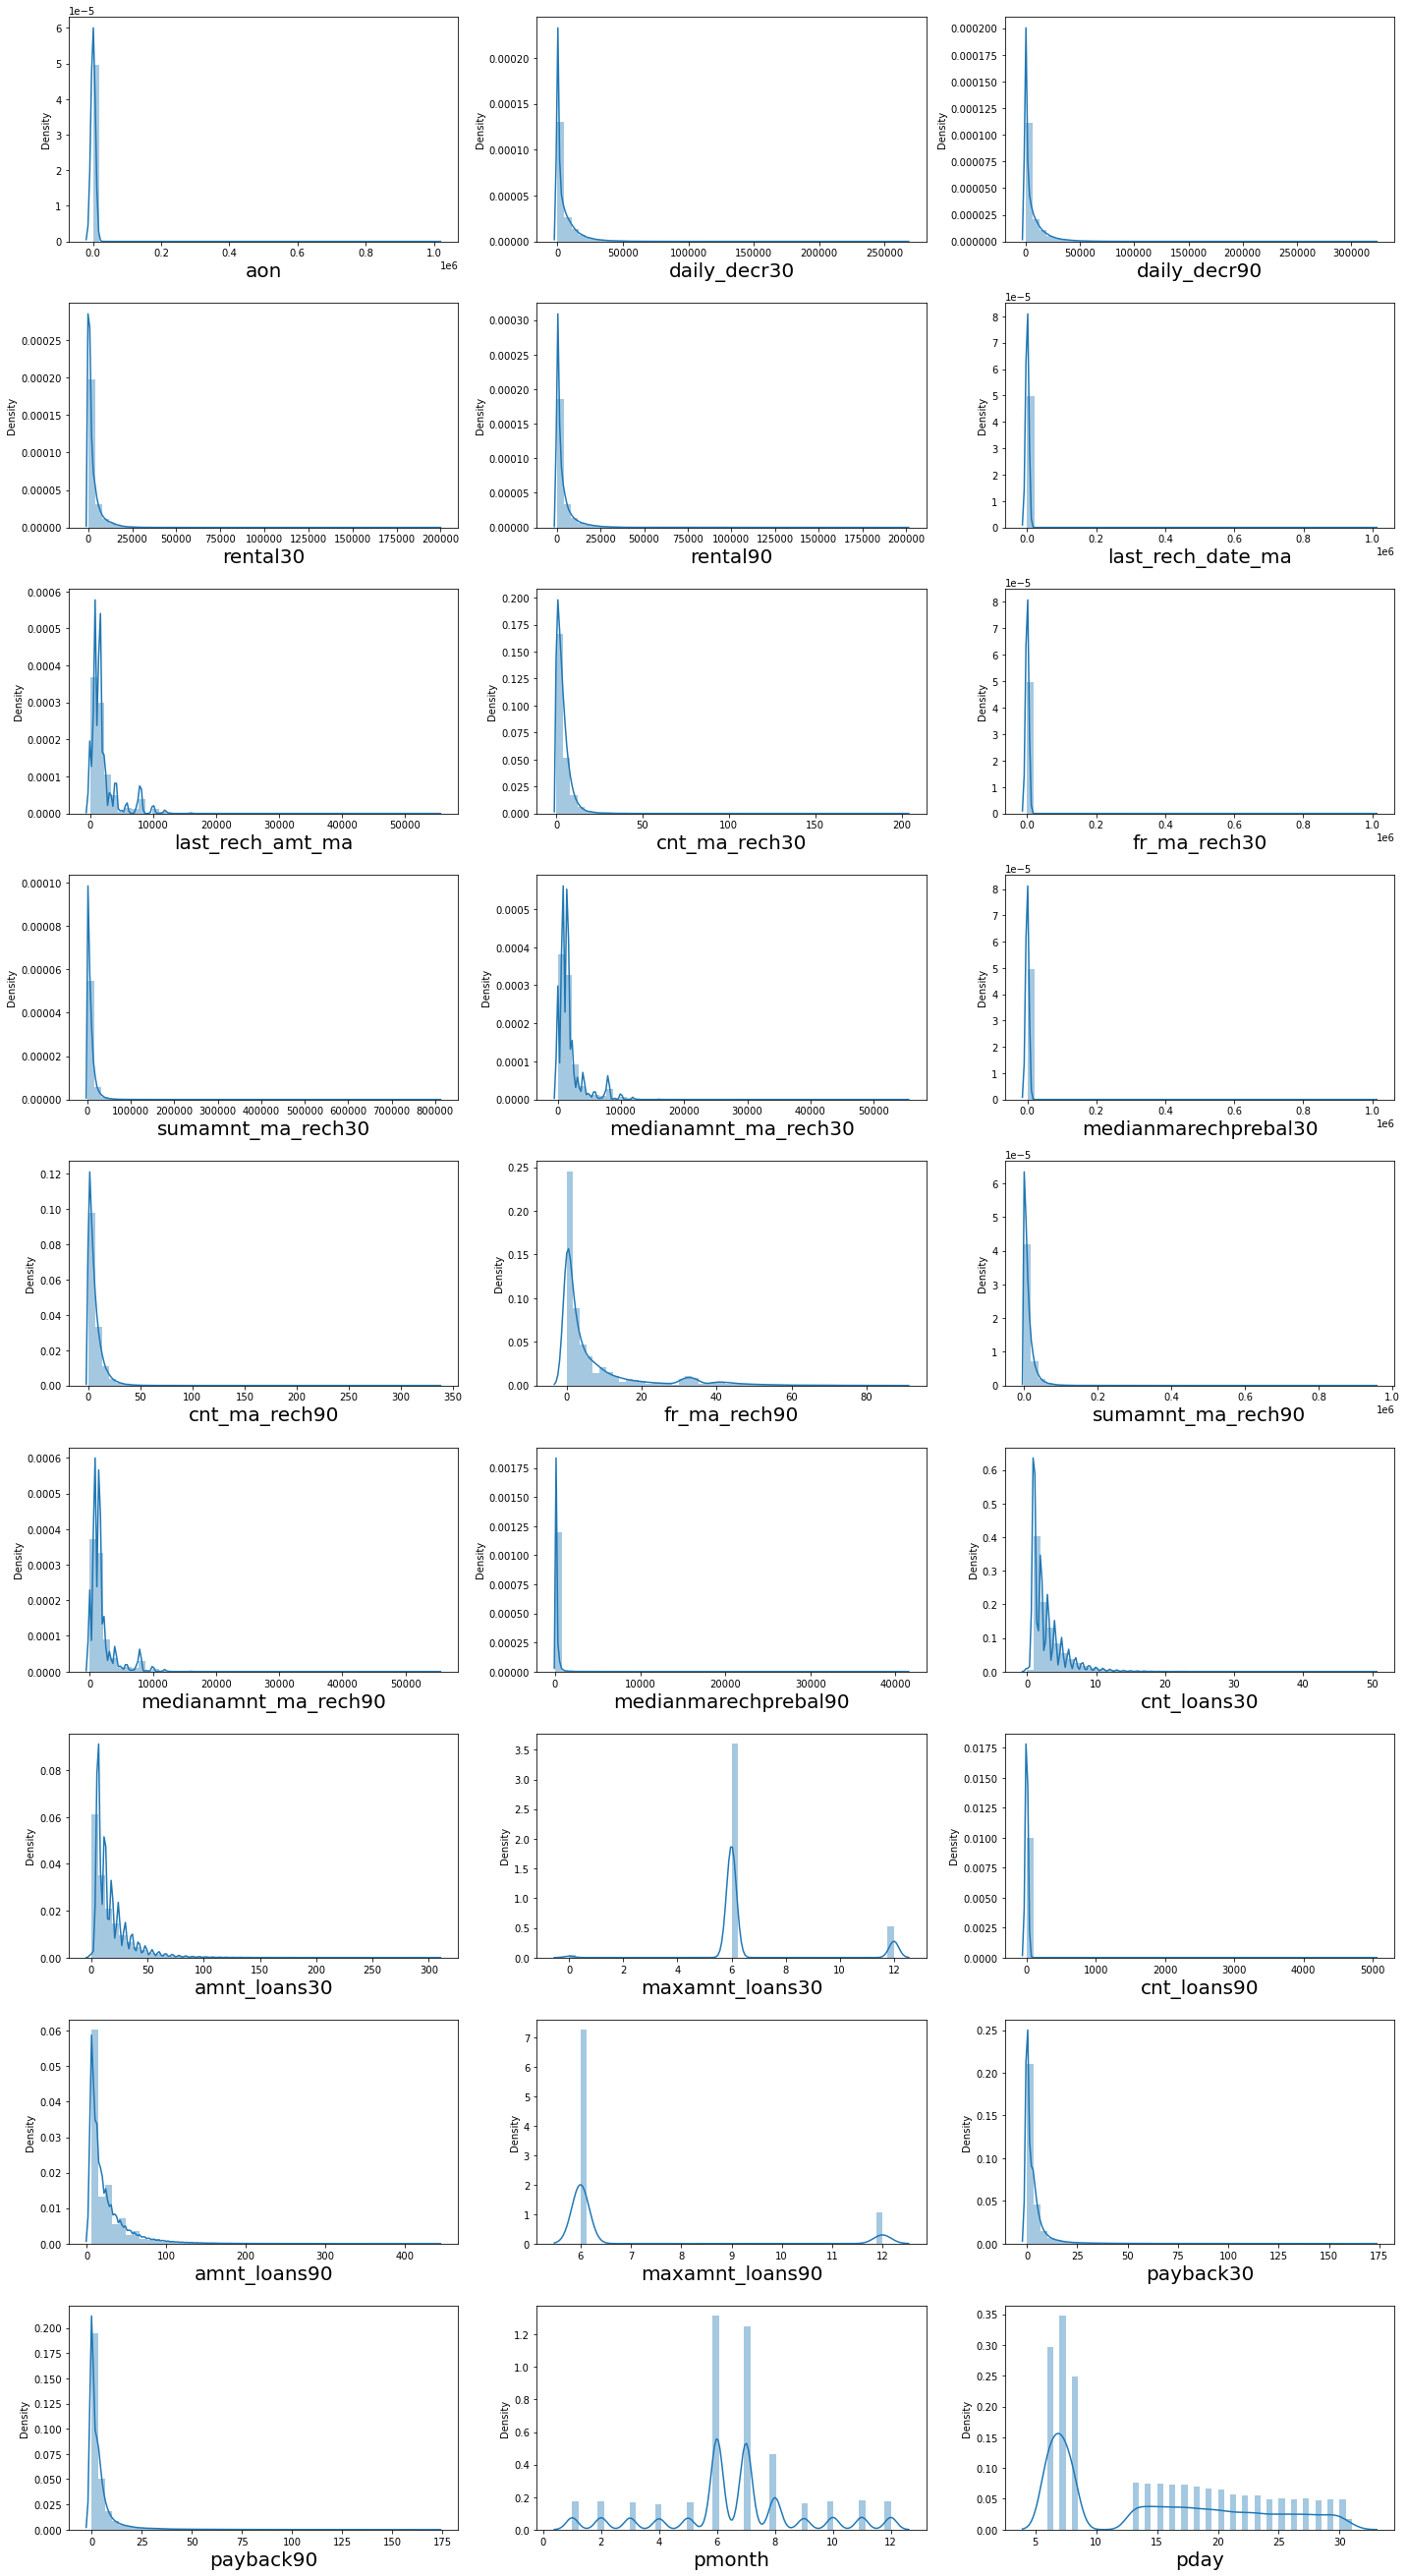

In [39]:
#Distribution plot for all numerical columns except label
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[col]:
    if plotnumber <=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

# OBSERVATIONS:

I can clearly see that there is skewness in most of the columns so we have to treat them.

<AxesSubplot:xlabel='label', ylabel='count'>

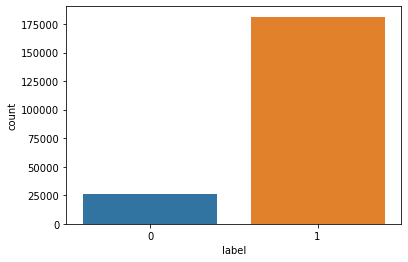

In [40]:
#count plot for target column
sns.countplot(df['label'])

There is a data imbalancing issue so we have to treat this by using oversampling or undersampling.

# Bivariate Analysis:

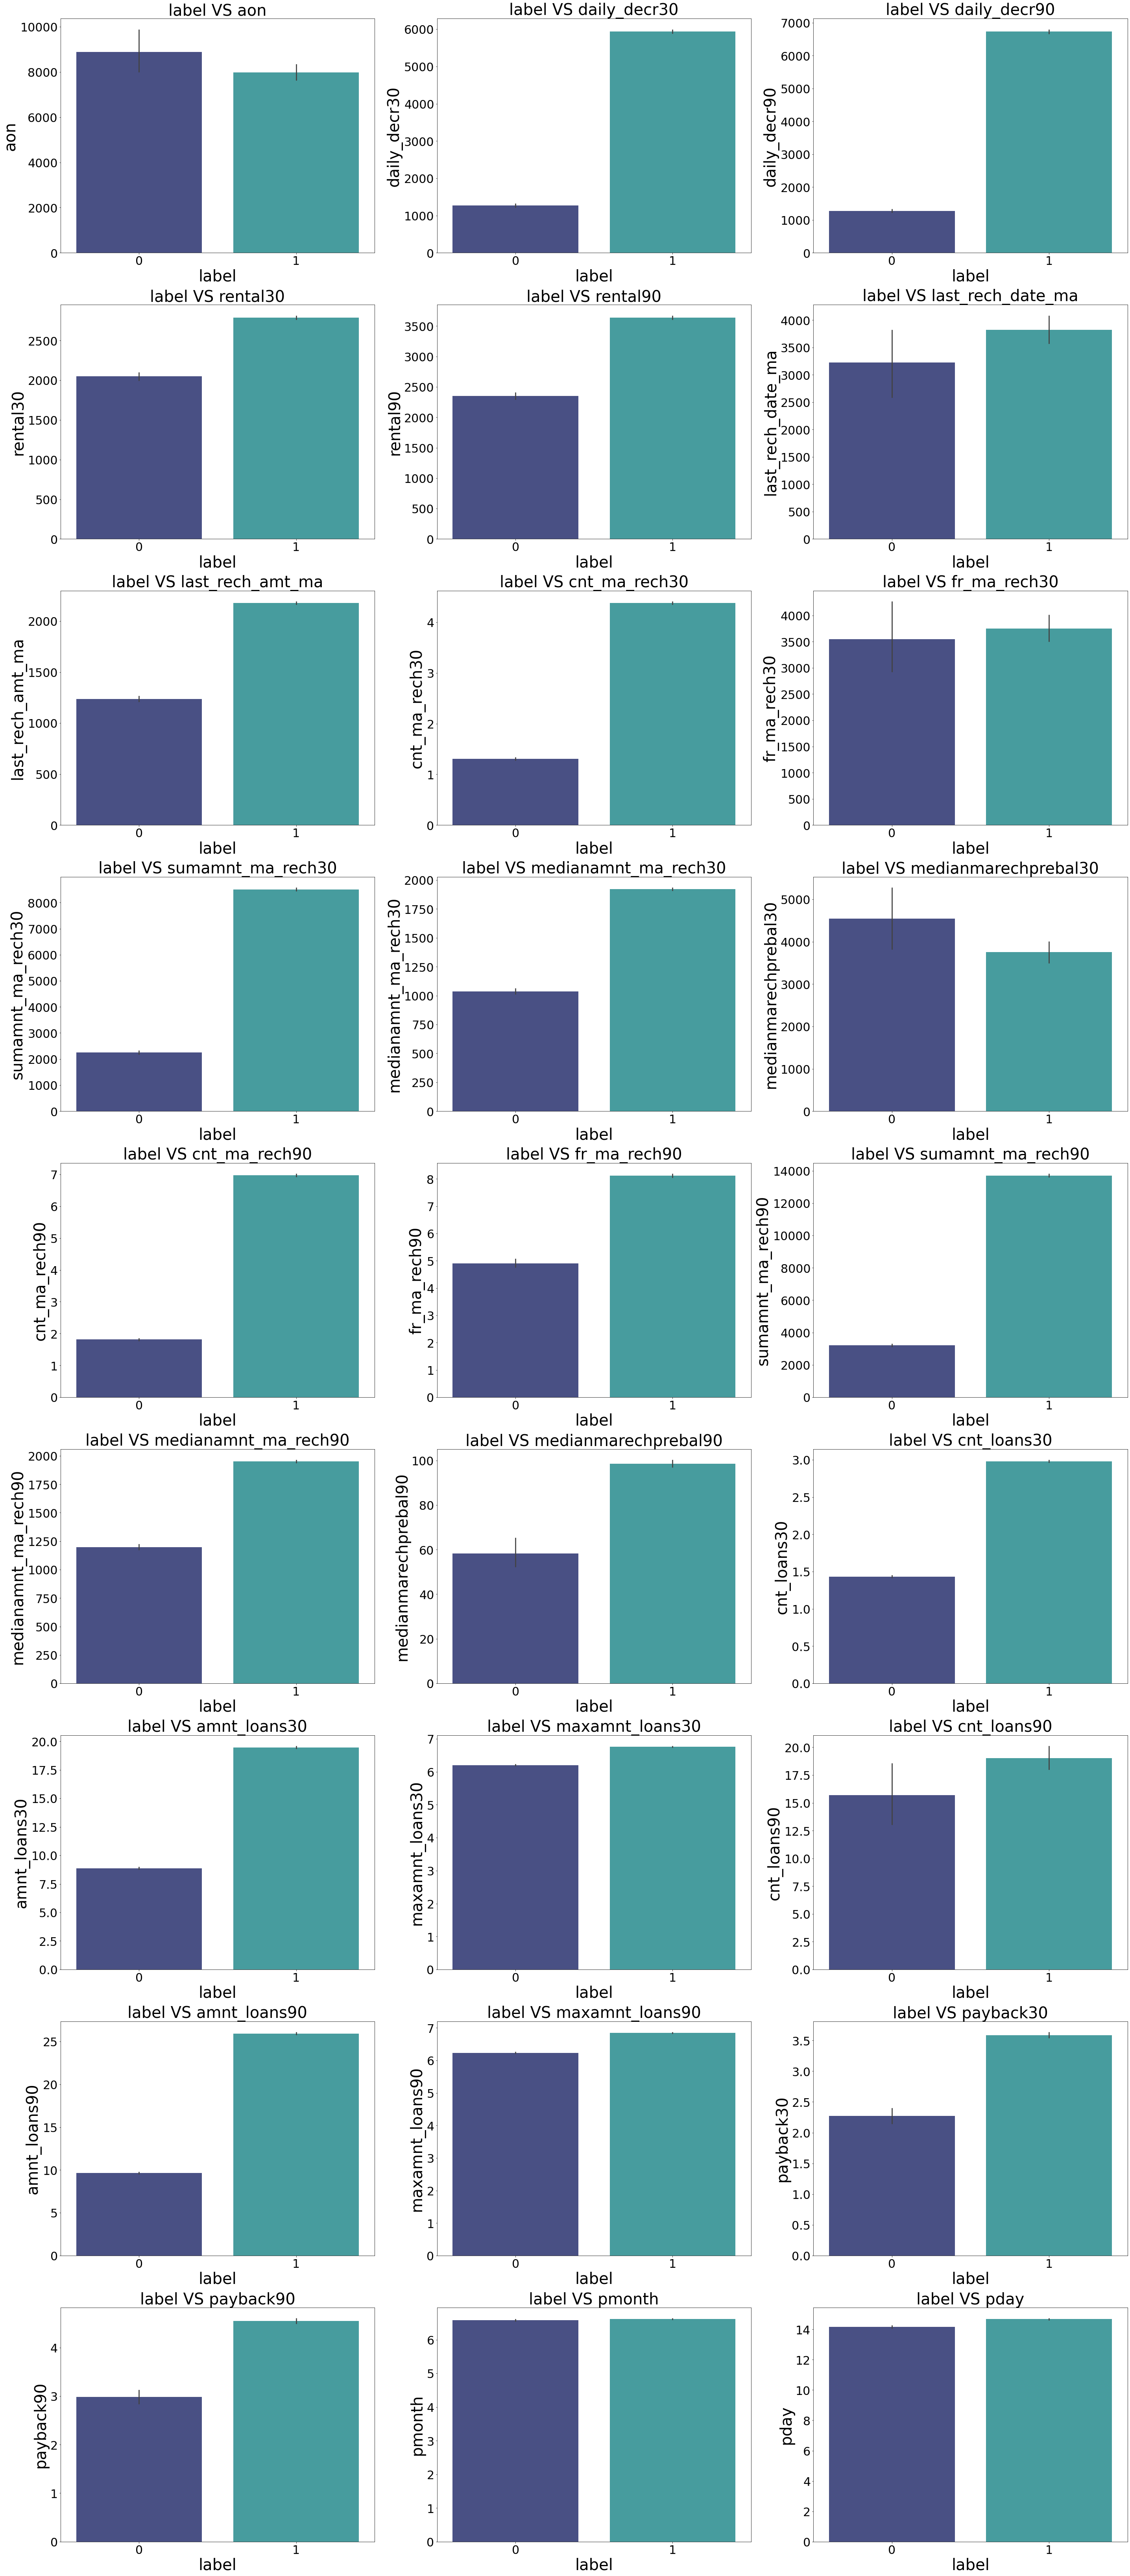

In [41]:
#barplot for numerical columns
plt.figure(figsize=(40,100))
for i in range(len(col)):
    plt.subplot(10,3,i+1)
    sns.barplot(x=df['label'], y=df[col[i]], palette="mako")
    plt.title(f"label VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(col[i],fontsize = 40)
    plt.tight_layout()

# OBSERVATIONS:


    1.Customers with high value of Age on cellular network in days(aon) are maximum defaulters(who have not paid there loan amount-0).
    2.Customers with high value of Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)(daily_decr30) are maximum Non-defaulters(who have paid there loan amount-1).
    3.Customers with high value of Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)(daily_decr90) are maximum Non-defaulters(who have paid there loan amount-1).
    4.Customers with high value of Average main account balance over last 30 days(rental30) are maximum Non-defaulters(who have paid there loan amount-1).
    5.Customers with high value of Average main account balance over last 90 days(rental90) are maximum Non-defaulters(who have paid there loan amount-1).
    6.Customers with high Number of days till last recharge of main account(last_rech_date_ma) are maximum Non-defaulters(who have paid there loan amount-1).
    7.Customers with high value of Amount of last recharge of main account (in Indonesian Rupiah)(last_rech_amt_ma) are maximum Non-defaulters(who have paid there loan amount-1).
    8.Customers with high value of Number of times main account got recharged in last 30 days(cnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
    9.Customers with high value of Frequency of main account recharged in last 30 days(fr_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1) and also the count is high for defaulters comparitively Non-defaulters are more in number.
    10.Customers with high value of Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)(sumamnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
    11.Customers with high value of Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)(medianamnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
    12.Customers with high value of Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)(medianmarechprebal30) are maximum defaulters(who have not paid there loan amount-0).
    13.Customers with high value of Number of times main account got recharged in last 90 days(cnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
    14.Customers with high value of Frequency of main account recharged in last 90 days(fr_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
    15.Customers with high value of Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)(sumamnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
    16.Customers with high value of Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)(medianamnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
    17.Customers with high value of Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)(medianmarechprebal90) are maximum Non-defaulters(who have paid there loan amount-1).
    18.Customers with high value of Number of loans taken by user in last 30 days(cnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
    19.Customers with high value of Total amount of loans taken by user in last 30 days(amnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
    20.Customers with high value of maximum amount of loan taken by the user in last 30 days(maxamnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
    21.Customers with high value of Number of loans taken by user in last 90 days(cnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
    22.Customers with high value of Total amount of loans taken by user in last 90 days(amnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
    23.Customers with high value of maximum amount of loan taken by the user in last 90 days(maxamnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
    24.Customers with high value of Average payback time in days over last 30 days(payback30) are maximum Non-defaulters(who have paid there loan amount-1).
    25.Customers with high value of Average payback time in days over last 90 days(payback90) are maximum Non-defaulters(who have paid there loan amount-1).
    26.In between 6th and 7th month maximum customers both defualters and Non-defaulters have paid there loan amount.
    27.Below 14th of each month all the customers have paid there loan amount.


# Data Cleaning:

# Checking for outliers:

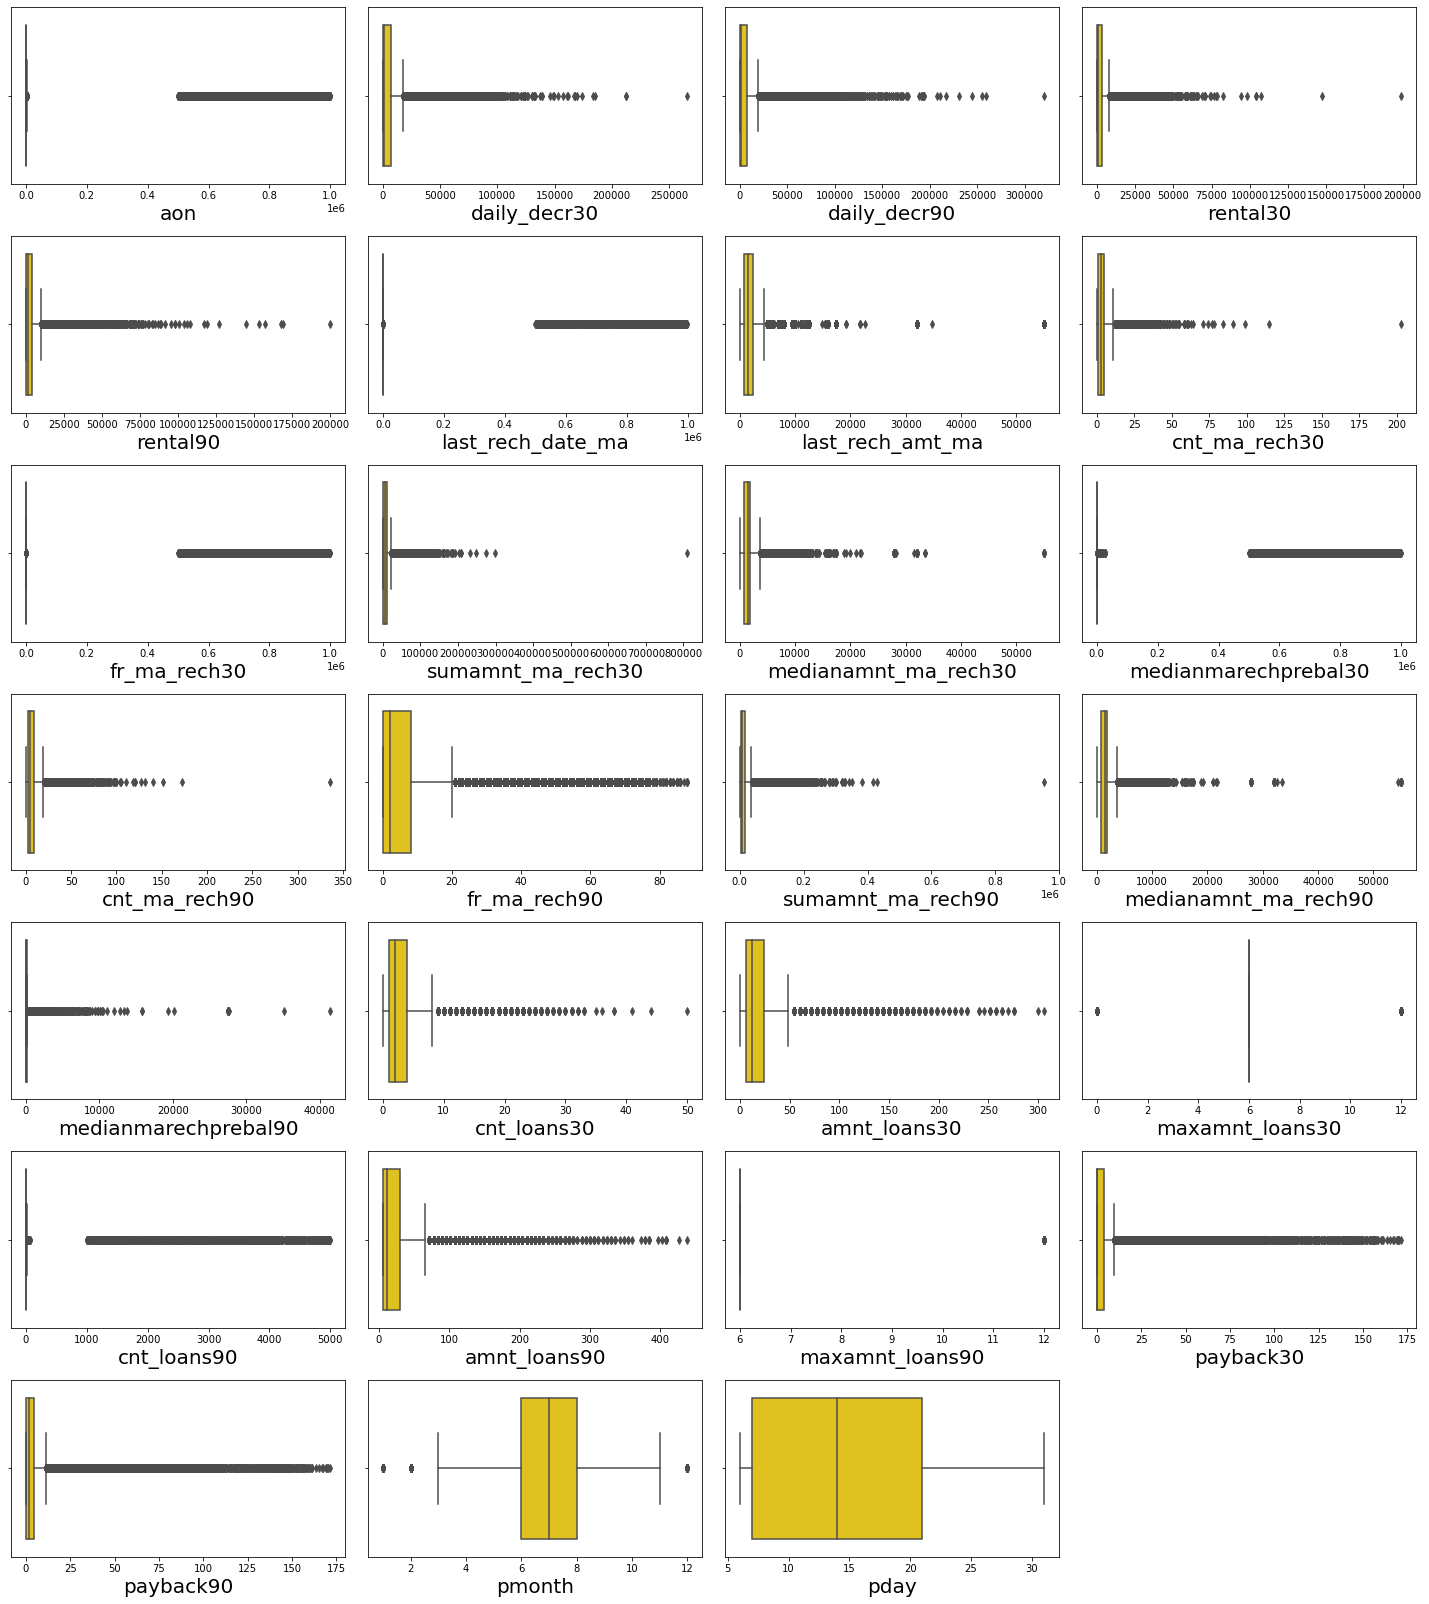

In [42]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()



There are outliers in almost all the columns except pmonth and pday.

# Removing Outliers:

# i) Zscore method:

In [43]:
#Features having outliers 
features=df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth']]

Above are the list of columns with outliers in the dataset.

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,2,12,6.0,2.0,12,6,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,1,12,12.0,1.0,12,12,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,1,6,6.0,1.0,6,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,7,42,6.0,7.0,42,6,2.333333,2.333333,6,22


In [45]:
#Checking shape of new dataset
df_new.shape

(170071, 28)

In my new dataset i have 170071 rows and 28 columns.

In [46]:
#Checking shape of old dataset
df.shape

(207550, 28)

In my old dataset i have 207550 rows and 28 columns.

In [47]:
#Checking dataloss in zscore method
Dataloss = (((207550-170071)/207550)*100)
Dataloss

18.05781739339918

In Z-score method the data loss is more than 10% so let me have a look into IQR method to remove outliers.

# ii) IQR method:

In [48]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness of the dataset using IQR method.

In [49]:
#Checking shape of new dataset
df_1.shape

(69108, 28)

In my new dataset i have 78654 rows and 28 columns.

In [50]:
#Checking shape of old dataset
df.shape

(207550, 28)

In my old dataset i have 207550 rows and 28 columns.

In [51]:
#Checking dataloss in IQR method of the dataset
Dataloss = (((207550-78654)/207550)*100)
Dataloss

62.103589496506864

In IQR method the data loss is more than 10% so let me have a look into percentile method to remove outliers.

# iii) Percentile Method:

In [52]:
#Removing outliers using percentile method
for colu in features:
    if df[colu].dtypes != 'object':
        percentile = df[colu].quantile([0.01,0.98]).values
        df[colu][df[colu]<=percentile[0]]=percentile[0]
        df[colu][df[colu]>=percentile[1]]=percentile[1]

I have successfully removed outliers in the dataset using percentile method.

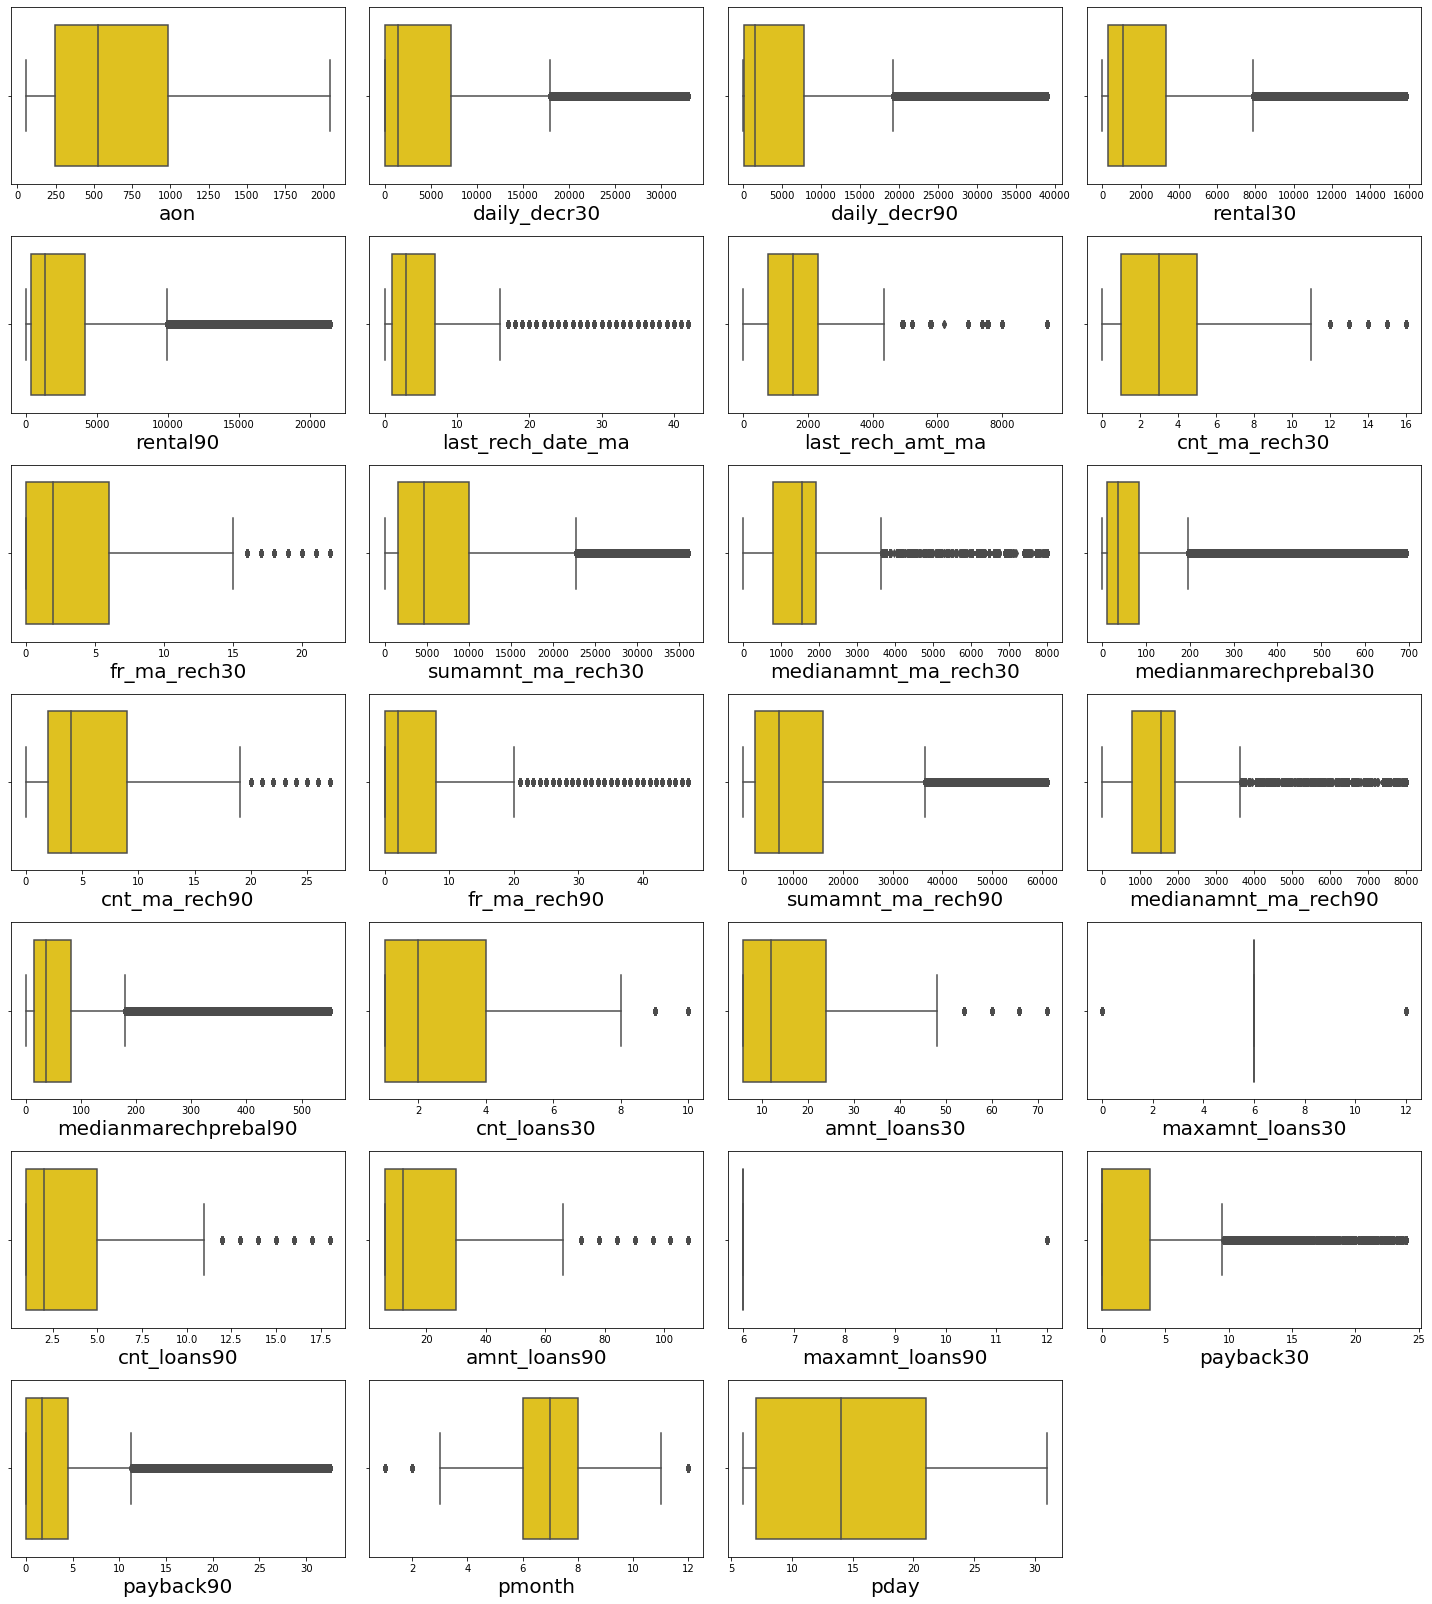

In [53]:
# Checking if the outliers is reduced or not

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Outliers has reduced in all the columns.

# Checking for skewness:

In [54]:
#Checking for skewness in the dataset
df.skew()

label                  -2.253346
aon                     0.934791
daily_decr30            1.978547
daily_decr90            2.098290
rental30                2.117210
rental90                2.205817
last_rech_date_ma       2.565623
last_rech_amt_ma        2.016661
cnt_ma_rech30           1.410702
fr_ma_rech30            1.703431
sumamnt_ma_rech30       1.749207
medianamnt_ma_rech30    2.122065
medianmarechprebal30    2.799234
cnt_ma_rech90           1.566573
fr_ma_rech90            1.987801
sumamnt_ma_rech90       1.863681
medianamnt_ma_rech90    2.143777
medianmarechprebal90    2.631175
cnt_loans30             1.597669
amnt_loans30            1.752260
maxamnt_loans30         1.634976
cnt_loans90             2.000454
amnt_loans90            1.910837
maxamnt_loans90         2.224471
payback30               2.635055
payback90               2.826565
pmonth                 -0.095298
pday                    0.460431
dtype: float64

There is skewness in almost all columns except pmonth,pday and as label is my target i should not remove skewness from this column.

# Removing skewness using yeo-johnson method:

In [55]:
#Creating a list of skewed features
fea=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90'] 

Taking a list as fea with all the columns with skewness.

In [56]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i am removing the skewness.

In [57]:
df[fea] = scaler.fit_transform(df[fea].values)

Got removed from skewness

In [58]:
#Checking skewness again
df[fea].skew()

aon                    -0.059261
daily_decr30           -0.137650
daily_decr90           -0.127335
rental30               -0.062522
rental90               -0.062946
last_rech_date_ma       0.043916
last_rech_amt_ma       -0.106643
cnt_ma_rech30          -0.010536
fr_ma_rech30            0.131926
sumamnt_ma_rech30      -0.369147
medianamnt_ma_rech30   -0.237104
medianmarechprebal30   -0.046085
cnt_ma_rech90          -0.012334
fr_ma_rech90            0.141522
sumamnt_ma_rech90      -0.266852
medianamnt_ma_rech90   -0.101431
medianmarechprebal90   -0.029793
cnt_loans30             0.219771
amnt_loans30            0.146844
maxamnt_loans30         0.381337
cnt_loans90             0.201541
amnt_loans90            0.129122
maxamnt_loans90         0.000000
payback30               0.278283
payback90               0.193524
dtype: float64

Skewness in all the columns has been reduced.

# Checking correlation using heat map:

In [59]:
cor=df.corr()
cor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
label,1.000000,0.097208,0.266444,0.268775,0.142205,0.155661,0.064305,0.262083,0.347162,0.243564,...,0.276082,0.291492,0.075952,0.293548,0.309039,0.101247,0.236554,0.244596,0.004834,0.021377
aon,0.097208,1.000000,0.117096,0.117840,0.084111,0.092045,0.062278,0.097625,0.038139,0.070579,...,0.081993,0.087453,0.028230,0.116259,0.118862,0.038690,0.080812,0.111218,0.014707,0.021105
daily_decr30,0.266444,0.117096,1.000000,0.998435,0.585638,0.641529,0.123072,0.375006,0.498882,0.297504,...,0.398639,0.469091,0.329454,0.530528,0.585352,0.406822,0.336835,0.413587,0.169583,0.019364
daily_decr90,0.268775,0.117840,0.998435,1.000000,0.586036,0.646414,0.126662,0.374533,0.494780,0.296841,...,0.394111,0.465628,0.329547,0.532191,0.587372,0.409956,0.334597,0.414701,0.175938,0.011421
rental30,0.142205,0.084111,0.585638,0.586036,1.000000,0.974866,0.055640,0.284950,0.457289,0.248717,...,0.351445,0.391547,0.229190,0.426924,0.457818,0.279351,0.313625,0.349548,0.114736,0.115841
rental90,0.155661,0.092045,0.641529,0.646414,0.974866,1.000000,0.086931,0.294793,0.450131,0.251783,...,0.344863,0.391728,0.243832,0.447225,0.482003,0.306454,0.311970,0.368359,0.138318,0.099229
last_rech_date_ma,0.064305,0.062278,0.123072,0.126662,0.055640,0.086931,1.000000,0.518141,-0.016311,0.062349,...,-0.076541,-0.067983,-0.004410,-0.027212,-0.022283,0.016073,-0.094731,-0.020555,-0.007982,0.043901
last_rech_amt_ma,0.262083,0.097625,0.375006,0.374533,0.284950,0.294793,0.518141,1.000000,0.324761,0.274736,...,0.184620,0.221013,0.147657,0.216948,0.246442,0.185654,0.147133,0.184311,0.042273,0.065253
cnt_ma_rech30,0.347162,0.038139,0.498882,0.494780,0.457289,0.450131,-0.016311,0.324761,1.000000,0.416578,...,0.732750,0.738661,0.176343,0.710656,0.723829,0.194797,0.546307,0.488019,0.044262,0.109000
fr_ma_rech30,0.243564,0.070579,0.297504,0.296841,0.248717,0.251783,0.062349,0.274736,0.416578,1.000000,...,0.339864,0.349147,0.090392,0.351095,0.362987,0.102128,0.415946,0.394390,0.041362,0.086713


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

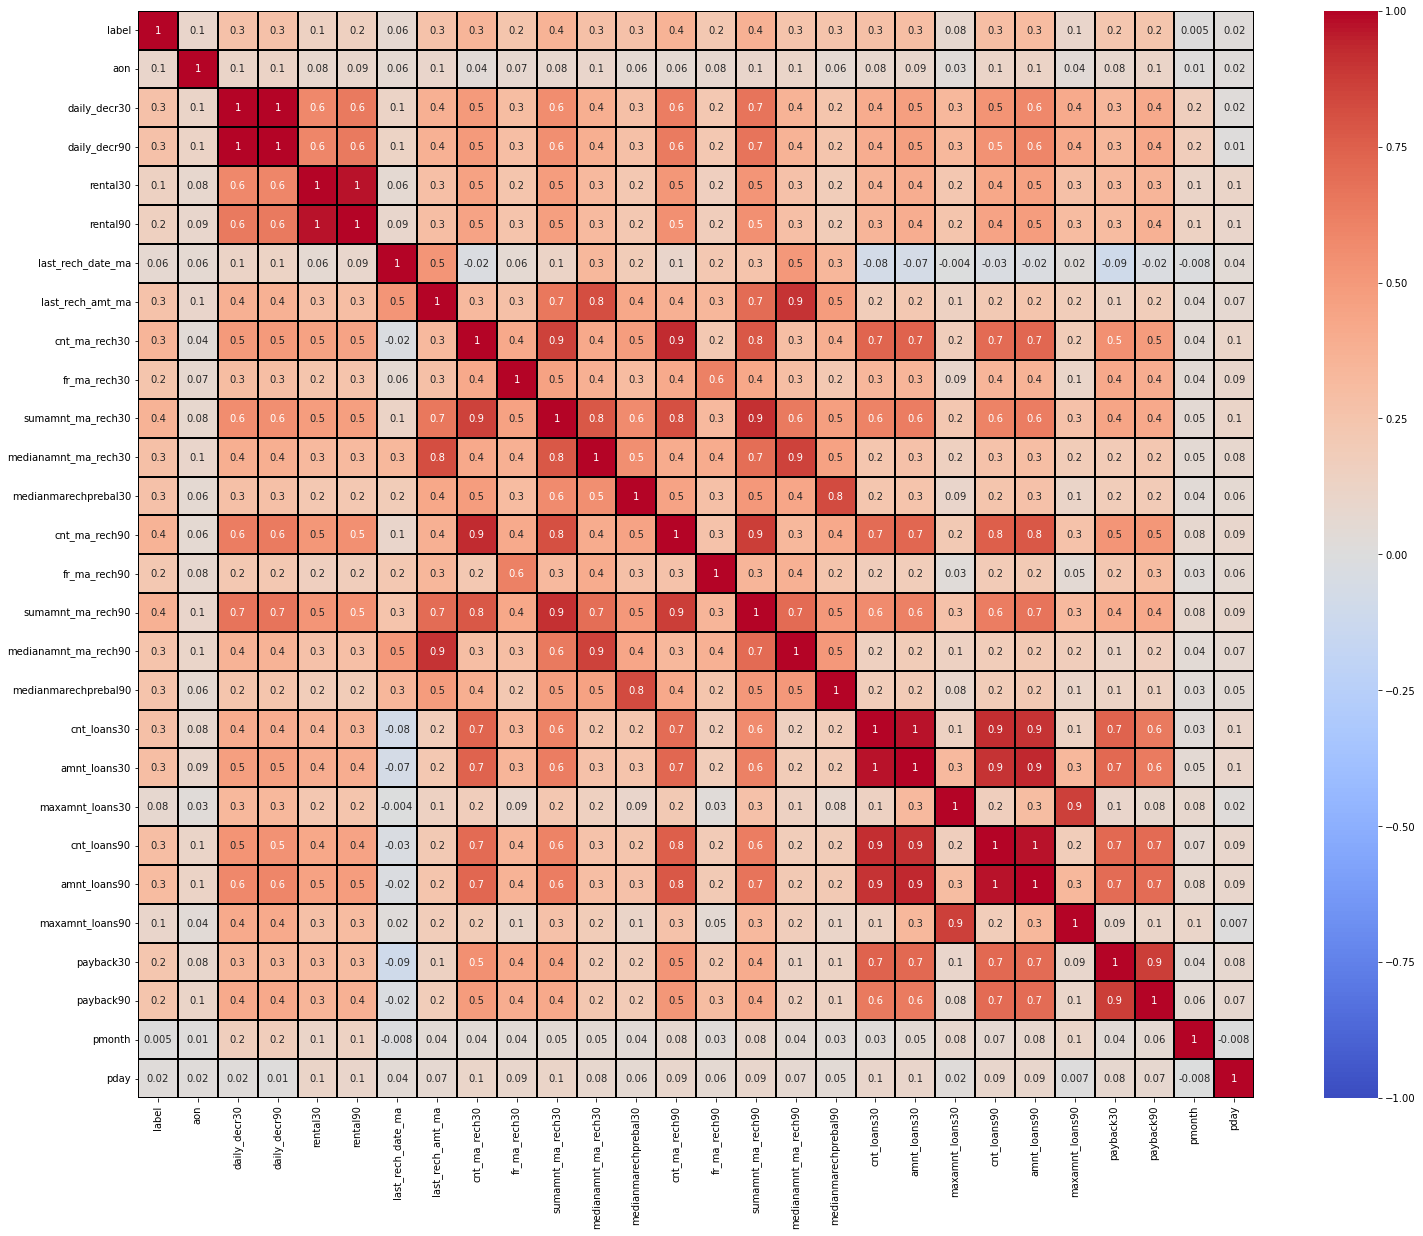

In [60]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);



Let's visualize the correlation of all the features with target to get better insight.

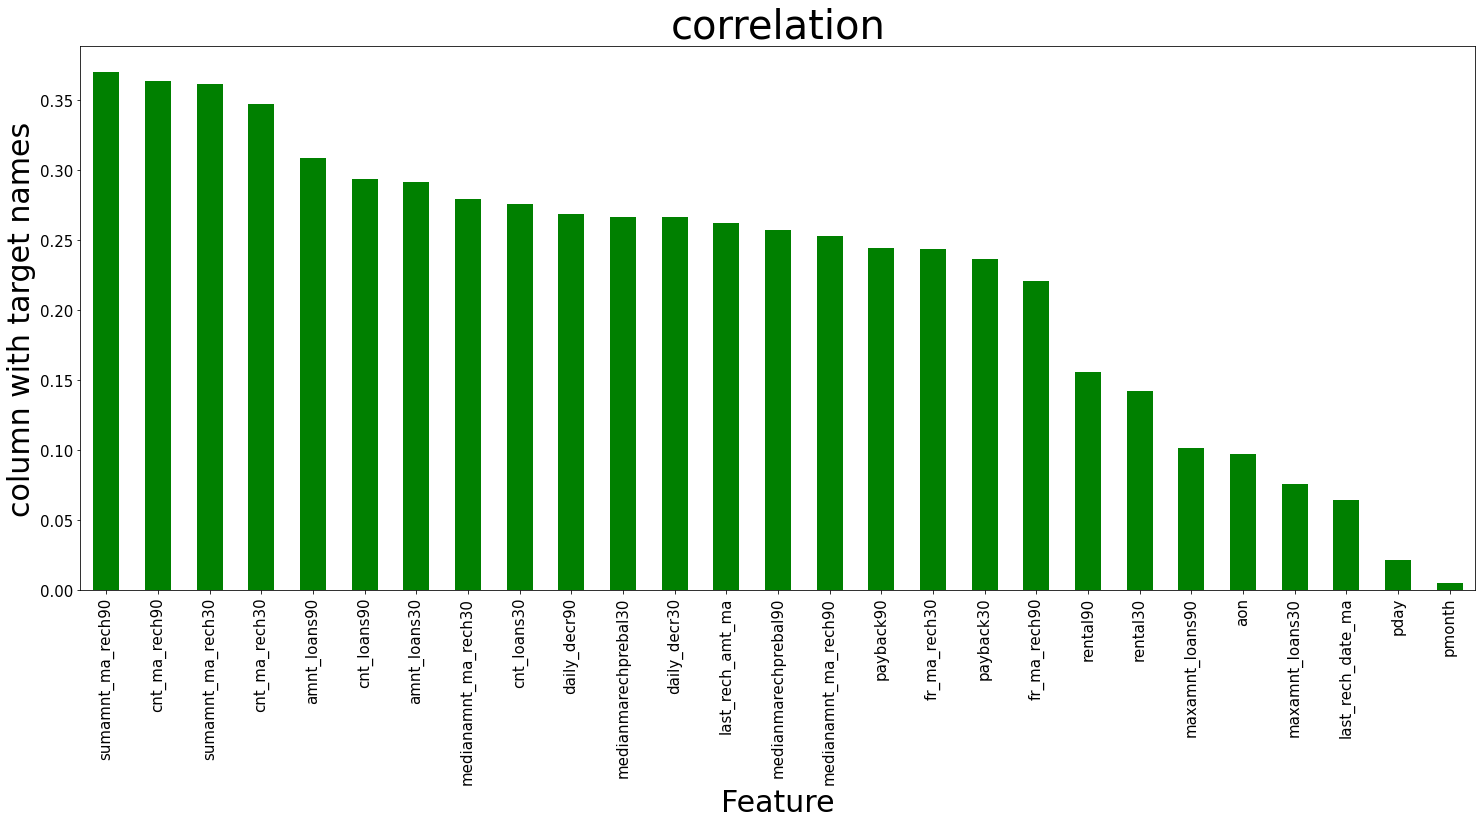

In [61]:
plt.figure(figsize=(25,10))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()



We don't find any columns with negligible correlation. Even though pday is less correlated we can keep it and preceed.

# Separating Features and Target:

In [62]:
x = df.drop("label",axis=1)
y = df["label"]

I have separated my target and independent columns.

# Scaling the data using MinMax scaler:

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my data using MinMax scaler.

In [64]:
X.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0.348970,0.670388,0.661447,0.330465,0.335513,0.378383,0.498865,0.368297,0.990879,0.435328,...,0.392540,0.378664,0.633603,0.312710,0.321358,0.0,1.000000,0.984592,0.545455,0.56
1,0.625204,0.851665,0.834288,0.706042,0.668524,0.865622,0.831756,0.229617,0.000000,0.540837,...,0.000000,0.378664,1.000000,0.000000,0.321358,1.0,0.000000,0.000000,0.818182,0.08
2,0.537141,0.578404,0.572448,0.491889,0.470866,0.463708,0.498865,0.229617,0.000000,0.341592,...,0.000000,0.000000,0.633603,0.000000,0.000000,0.0,0.000000,0.000000,0.636364,0.52
3,0.318099,0.196647,0.198199,0.299475,0.290305,0.995905,0.411921,0.000000,0.000000,0.000000,...,0.392540,0.378664,0.633603,0.312710,0.321358,0.0,0.000000,0.000000,0.454545,0.00
4,0.718606,0.353656,0.353543,0.518649,0.495734,0.526388,0.584318,0.717633,0.448169,0.822222,...,0.910035,0.859875,0.633603,0.784192,0.767230,0.0,0.574148,0.497077,0.454545,0.64


This is the data of independent variables after scaling.

# Balancing the target variable using oversampling:

In [65]:
#Checking the value count of target column
y.value_counts()

1    181388
0     26162
Name: label, dtype: int64

In [66]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [67]:
# Checking the value counts again
y.value_counts()

0    181388
1    181388
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

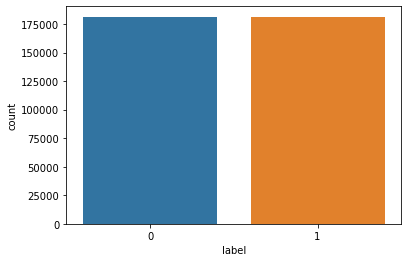

In [68]:
# Visualizing the target data after oversampling
sns.countplot(y)

Now the data looks beautifully balanced.

# Finding Best Random State and Accuracy:

In [69]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [70]:
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =93)
mod = DecisionTreeClassifier()
mod.fit(X_train, y_train)
pred = mod.predict(X_test)
acc=accuracy_score(y_test, pred)
    

In [71]:
print("Best accuracy is ",acc)

Best accuracy is  0.9136934569478008


# Classification Algorithms:

In [72]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score

# i) XGB Classifier:

In [73]:
XGB=XGBClassifier(verbosity=0)
XGB.fit(X_train,y_train)
predxg=XGB.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predxg)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predxg))
print(classification_report(y_test,predxg))

#cross validation score
scores = cross_val_score(XGB, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 94.87379746951751
Confusion Matrix: [[51342  3227]
 [ 2352 51912]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     54569
           1       0.94      0.96      0.95     54264

    accuracy                           0.95    108833
   macro avg       0.95      0.95      0.95    108833
weighted avg       0.95      0.95      0.95    108833


Cross validation score : 93.67575172920691
\Accuracy_Score - Cross Validation Score : 1.1980457403106044


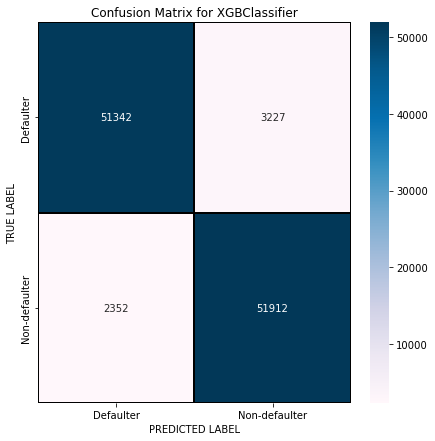

In [74]:
cm = confusion_matrix(y_test, predxg)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBClassifier')
plt.show()

We can see the true values and predicted values in XGB Classifier model using confusion matrix.

# ii) DecisionTreeClassifier:

In [75]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
Accuracy_Score = accuracy_score(y_test, preddt)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

#cross validation score
scores = cross_val_score(DTC, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 91.30686464583353
Confusion Matrix: [[50250  4319]
 [ 5142 49122]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     54569
           1       0.92      0.91      0.91     54264

    accuracy                           0.91    108833
   macro avg       0.91      0.91      0.91    108833
weighted avg       0.91      0.91      0.91    108833


Cross validation score : 91.07440420888733
\Accuracy_Score - Cross Validation Score : 0.232460436946198


DecisionTreeClassifier is giving me 92% accuracy.

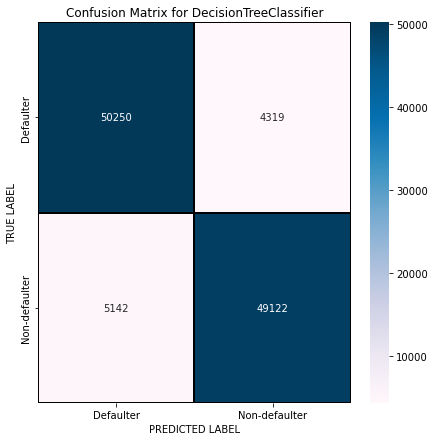

In [76]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

We can see the true values and predicted values in DecisionTreeClassifier model using confusion matrix.

# iii) BaggingClassifier:

In [77]:
BC=BaggingClassifier()
BC.fit(X_train,y_train)
predbc=BC.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predbc)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predbc))
print(classification_report(y_test,predbc))

#cross validation score
scores = cross_val_score(BC, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 94.20396387125228
Confusion Matrix: [[51956  2613]
 [ 3695 50569]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     54569
           1       0.95      0.93      0.94     54264

    accuracy                           0.94    108833
   macro avg       0.94      0.94      0.94    108833
weighted avg       0.94      0.94      0.94    108833


Cross validation score : 93.78599386131556
\Accuracy_Score - Cross Validation Score : 0.41797000993672384


BaggingClassifier is giving me 94% accuracy.

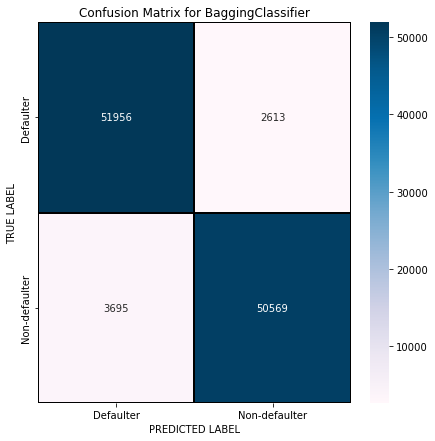

In [78]:
cm = confusion_matrix(y_test, predbc)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for BaggingClassifier')
plt.show()

We can see the true values and predicted values in BaggingClassifier model using confusion matrix.

# iv) AdaBoostClassifier:

In [79]:
ABC=AdaBoostClassifier()
ABC.fit(X_train,y_train)
predab=ABC.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predab)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predab))
print(classification_report(y_test,predab))

#cross validation score
scores = cross_val_score(ABC, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 84.3310392987421
Confusion Matrix: [[46033  8536]
 [ 8517 45747]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     54569
           1       0.84      0.84      0.84     54264

    accuracy                           0.84    108833
   macro avg       0.84      0.84      0.84    108833
weighted avg       0.84      0.84      0.84    108833


Cross validation score : 84.3104391428956
\Accuracy_Score - Cross Validation Score : 0.020600155846494772


AdaBoost Classifier is giving me 85% accuracy.

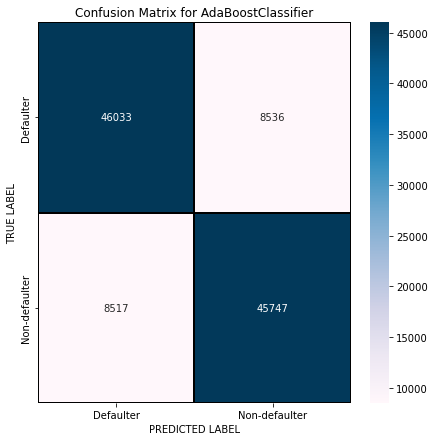

In [80]:
cm = confusion_matrix(y_test, predab)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoostClassifier')
plt.show()

We can see the true values and predicted values in AdaboostClassifier model using confusion matrix.

# By looking into the difference of model accuracy and cross validation score i found BaggingClassifier as the best model with 95.16% accuracy and the difference between model accuracy and cross validation score is 0.44.

# ROC-AUC curve:

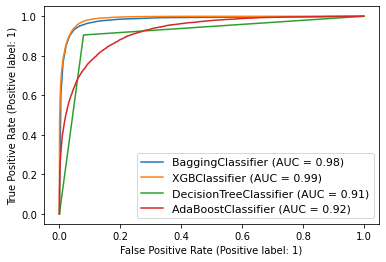

In [81]:
# Plotting ROC for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(BC,X_test,y_test)
plot_roc_curve(XGB, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, X_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()



Above is the ROC curves for all the models that i have predicted.And the AUC values can also be seen in the plot.

    AUC value is high for XGBClassifier and BaggingClassifier.I got least difference in model accuracy and cross validation score for BaggingClassifier so BC is my best model.



# Hyper Parameter tuning:

In [83]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [84]:
parameter = {'bootstrap':['True','False'],
             'n_jobs': [-2,-1,1,2],
             'n_estimators':[10,20],
             'warm_start':['True','False']}

Giving the parameters list for BaggingClassifier model.

In [85]:
GCV=GridSearchCV(BaggingClassifier(),parameter,cv=5)

In [86]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': ['True', 'False'],
                         'n_estimators': [10, 20], 'n_jobs': [-2, -1, 1, 2],
                         'warm_start': ['True', 'False']})

In [87]:
GCV.best_params_

{'bootstrap': 'False', 'n_estimators': 20, 'n_jobs': 2, 'warm_start': 'True'}

In [88]:
Final_mod=BaggingClassifier(bootstrap='True', n_jobs=-1,warm_start='True', n_estimators=40)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print('Accuracy Score:',(accuracy_score(y_test,pred)*100))
print('Confusion matrix:',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score: 94.82509900489741
Confusion matrix: [[51821  2748]
 [ 2884 51380]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     54569
           1       0.95      0.95      0.95     54264

    accuracy                           0.95    108833
   macro avg       0.95      0.95      0.95    108833
weighted avg       0.95      0.95      0.95    108833



Great our model accuracy has increased from 94.16% to 94.82% which is good!!!

# AUC ROC CURVE for final model:

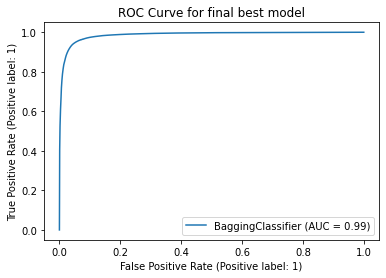

In [89]:
#Ploting ROC curve for final best model
plot_roc_curve(Final_mod, X_test, y_test)
plt.title('ROC Curve for final best model')
plt.show()

Great after hyperparameter tuning we got improvement in roc curve and AUC also.

# Saving the model:

In [90]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"MicroCreditLoan.pkl")

['MicroCreditLoan.pkl']

I have saved the final best model as MicroCreditLoan.Using .pkl.

# Predictions:

In [91]:
# Loading the saved model
model=joblib.load("MicroCreditLoan.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [92]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,108823,108824,108825,108826,108827,108828,108829,108830,108831,108832
Predicted,1,0,0,0,0,1,0,1,1,1,...,0,1,1,1,1,1,0,1,0,0
Actual,1,0,0,0,0,1,0,1,1,0,...,0,1,1,1,1,1,0,1,0,0


Above are the predicted values and the actual values.They are almost similar.

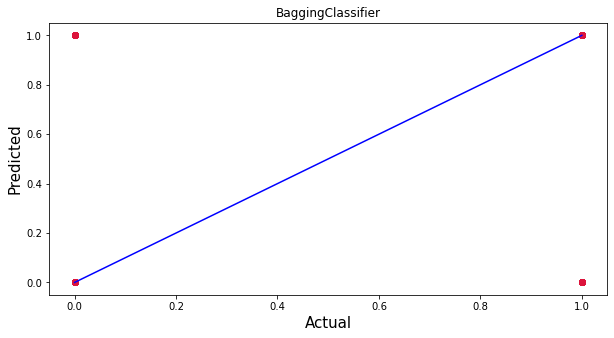

In [93]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("BaggingClassifier")
plt.show()

# 

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.
ThankYou:)